# 📊 Exploratory Data Analysis (EDA)

This notebook focuses on discovering trends, correlations, and insights from the Airbnb New User Booking dataset. Through various visualizations, we'll explore relationships between user attributes and their booking destinations.

## Objectives
- Visualize key relationships between features and target variable
- Identify patterns in user behavior and demographics
- Discover potentially useful features for prediction
- Gain insights to guide our modeling approach

## Import Required Libraries

In [14]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Others
import warnings
from pathlib import Path

# Settings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')
%matplotlib inline

## Load Data

In [15]:
# Load data
df = pd.read_csv('..\\train_users_2.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [16]:
# Check column types and summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [17]:
# Check numerical statistics
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


## Target Variable Analysis

Let's first look at the distribution of our target variable: `country_destination`.

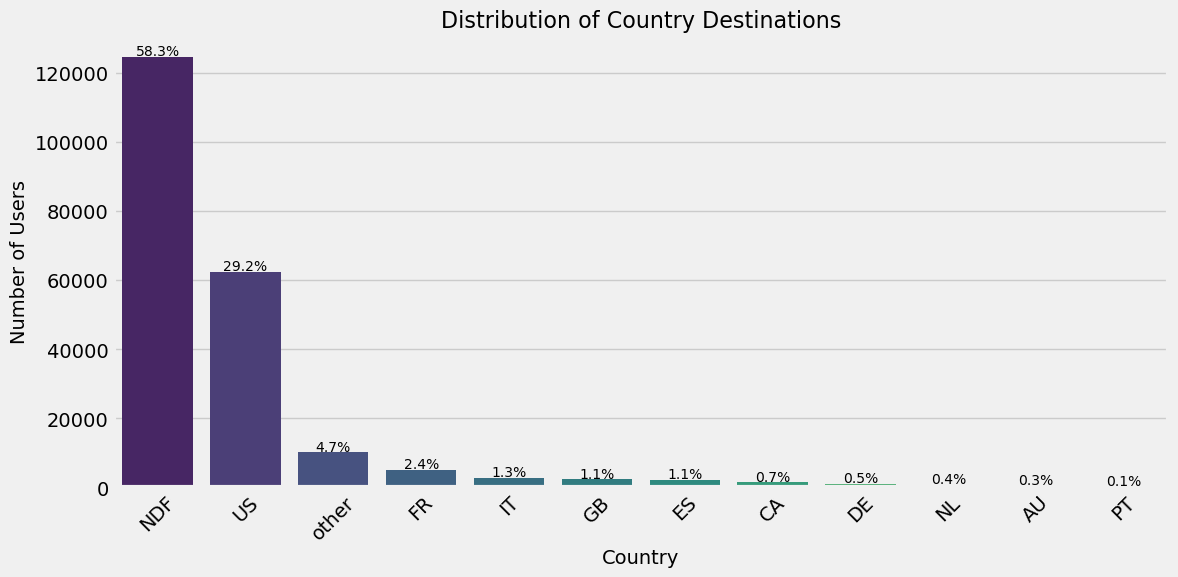

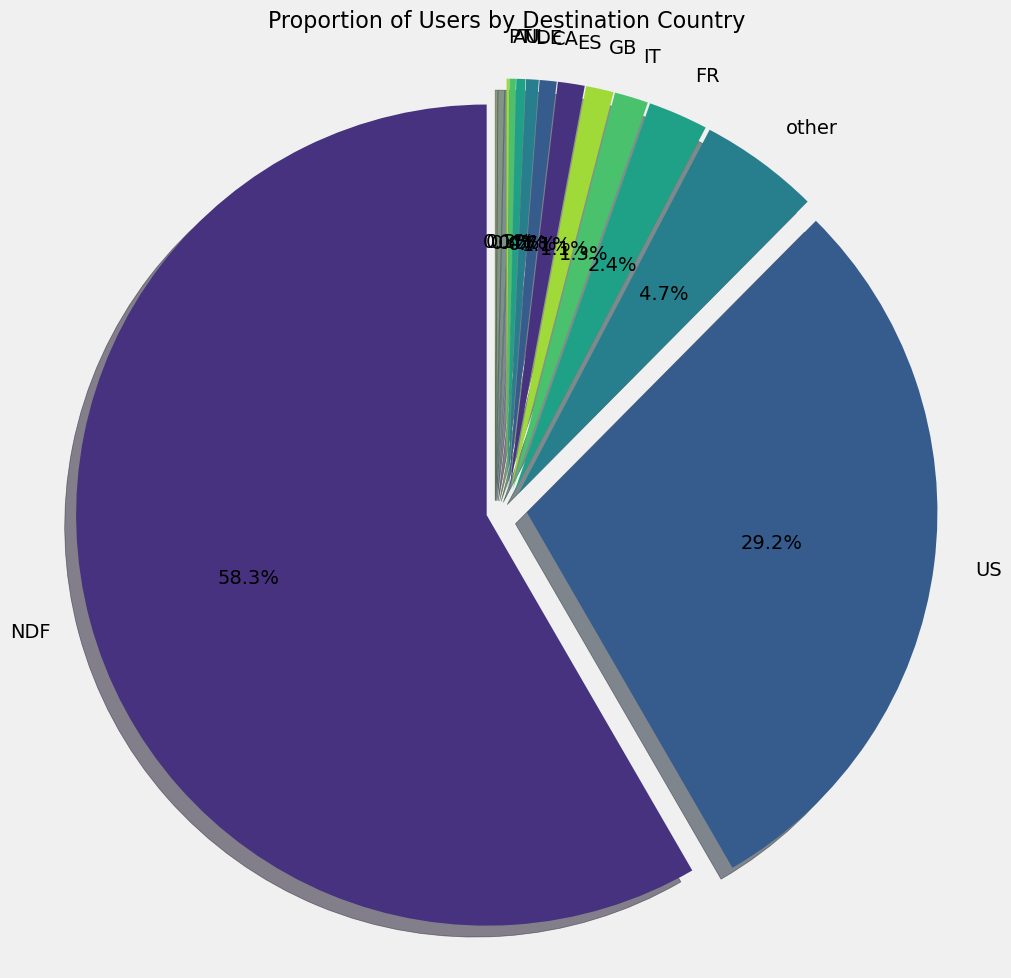

In [18]:
# Count the number of users in each destination
dest_counts = df['country_destination'].value_counts().reset_index()
dest_counts.columns = ['Country', 'Count']
dest_counts['Percentage'] = 100 * dest_counts['Count'] / dest_counts['Count'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', data=dest_counts, palette='viridis')
plt.title('Distribution of Country Destinations', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45)
for i, v in enumerate(dest_counts['Count']):
    plt.text(i, v + 500, f'{dest_counts["Percentage"][i]:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(dest_counts['Count'], labels=dest_counts['Country'], autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05] * len(dest_counts))
plt.title('Proportion of Users by Destination Country', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Demographic Analysis

### Age Distribution by Destination

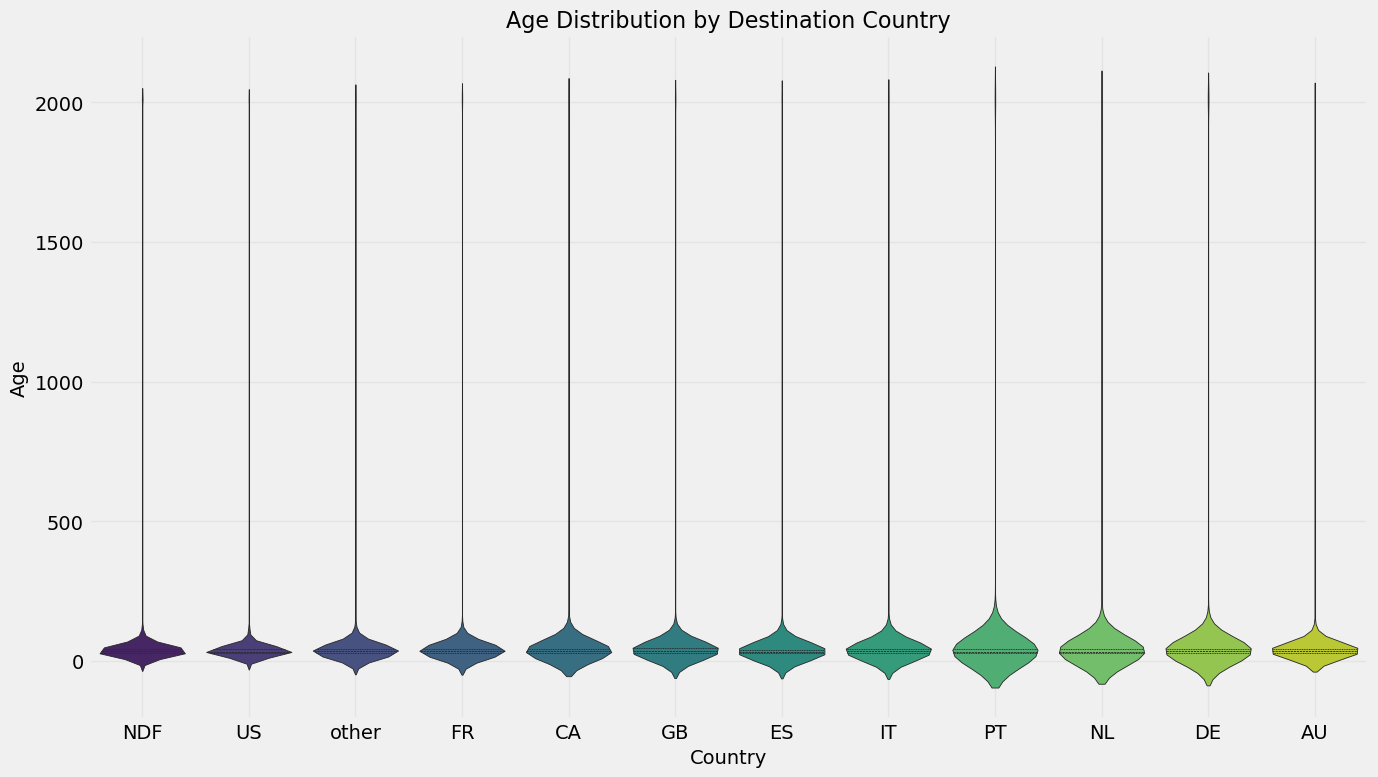

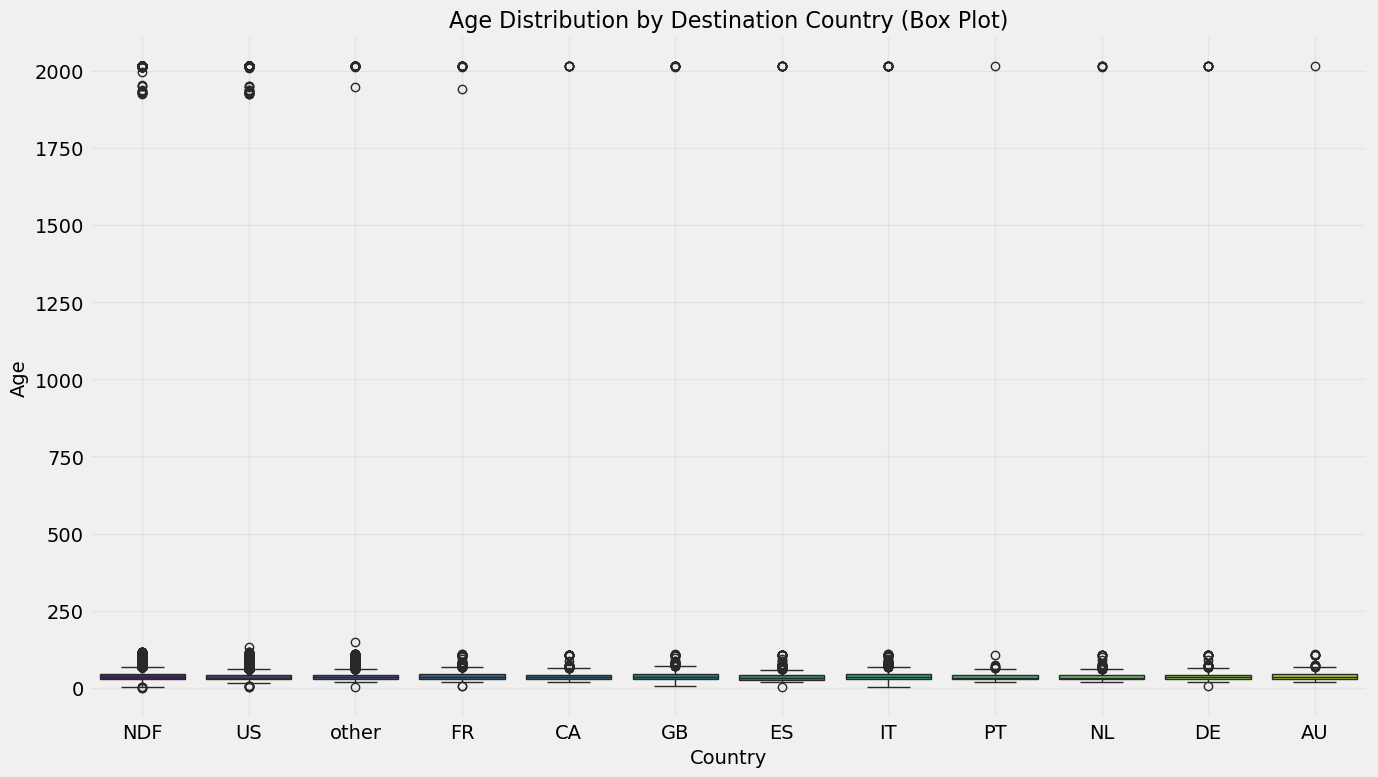

In [19]:
# Violin plot of age distribution by destination
plt.figure(figsize=(14, 8))
sns.violinplot(x='country_destination', y='age', data=df, palette='viridis', 
               inner='quartile', scale='width')
plt.title('Age Distribution by Destination Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Box plot for another view
plt.figure(figsize=(14, 8))
sns.boxplot(x='country_destination', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Destination Country (Box Plot)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

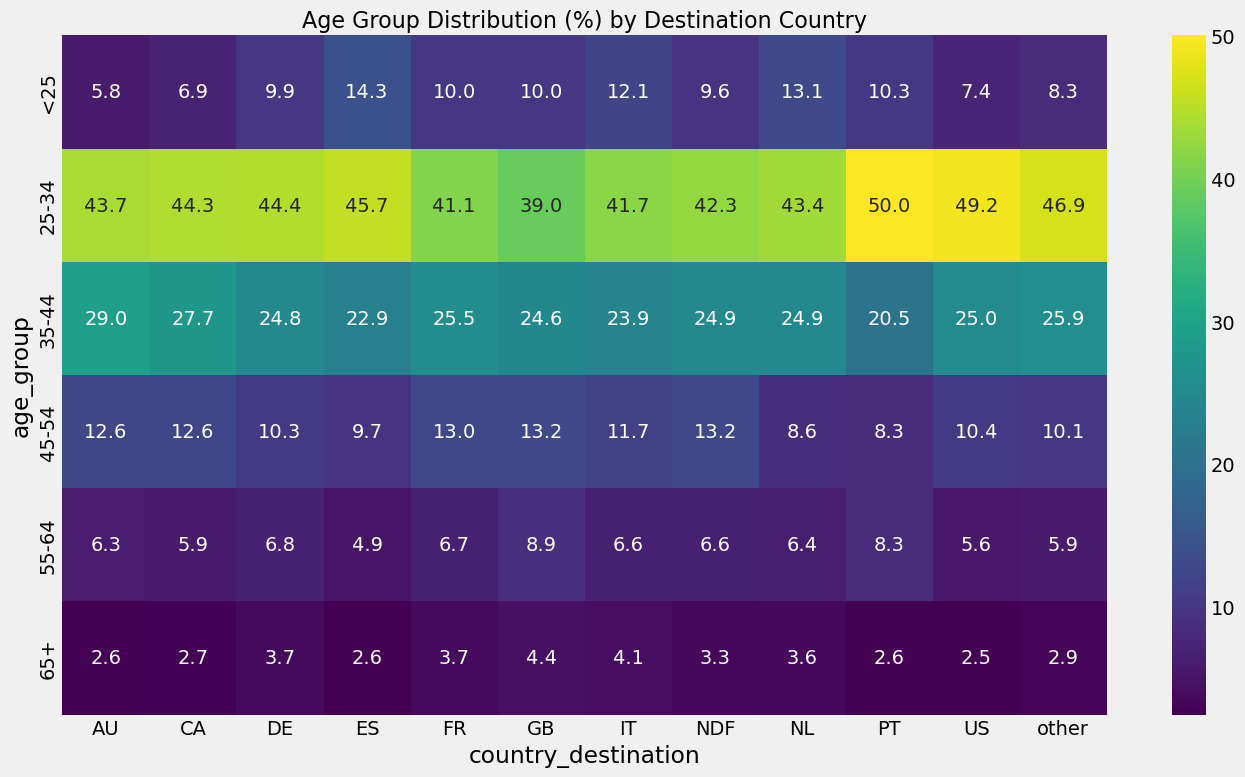

In [20]:
# Age group analysis
# Create age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate percentages of each age group per destination
age_dest = pd.crosstab(df['age_group'], df['country_destination'], normalize='columns') * 100

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(age_dest, annot=True, cmap='viridis', fmt='.1f')
plt.title('Age Group Distribution (%) by Destination Country', fontsize=16)
plt.tight_layout()
plt.show()

### Gender Analysis

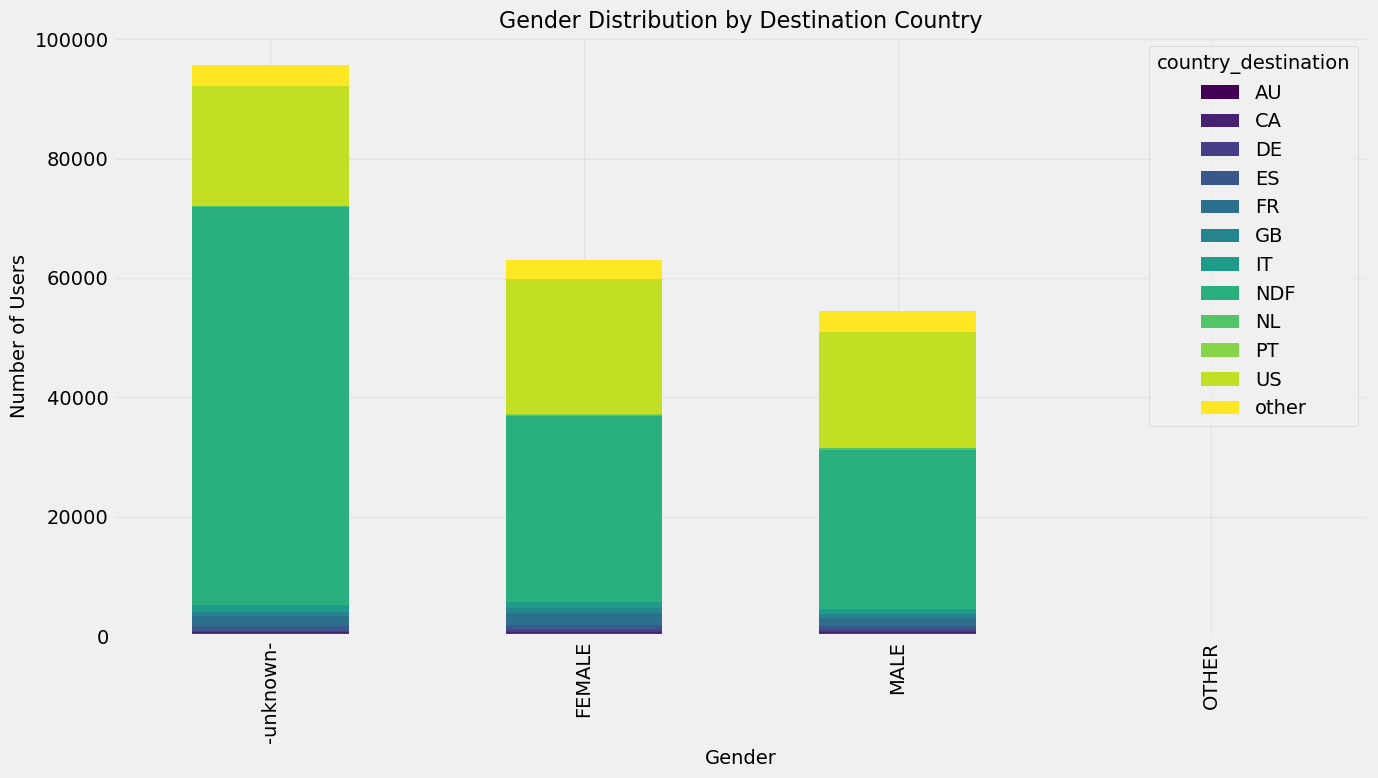

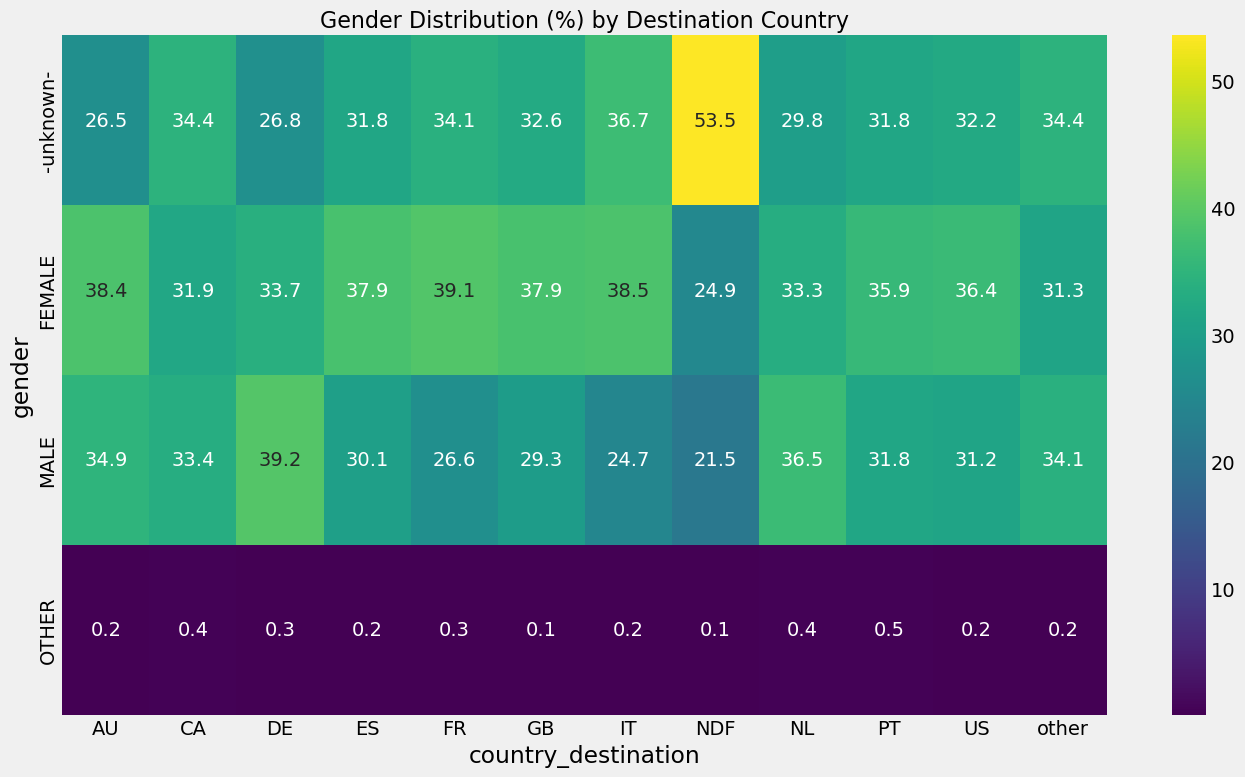

In [21]:
# Gender distribution by destination
gender_dest = pd.crosstab(df['gender'], df['country_destination'])
gender_dest_pct = pd.crosstab(df['gender'], df['country_destination'], normalize='columns') * 100

# Stacked bar chart
gender_dest.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Gender Distribution by Destination Country', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Percentage view
plt.figure(figsize=(14, 8))
sns.heatmap(gender_dest_pct, annot=True, cmap='viridis', fmt='.1f')
plt.title('Gender Distribution (%) by Destination Country', fontsize=16)
plt.tight_layout()
plt.show()

## Marketing Channel Analysis

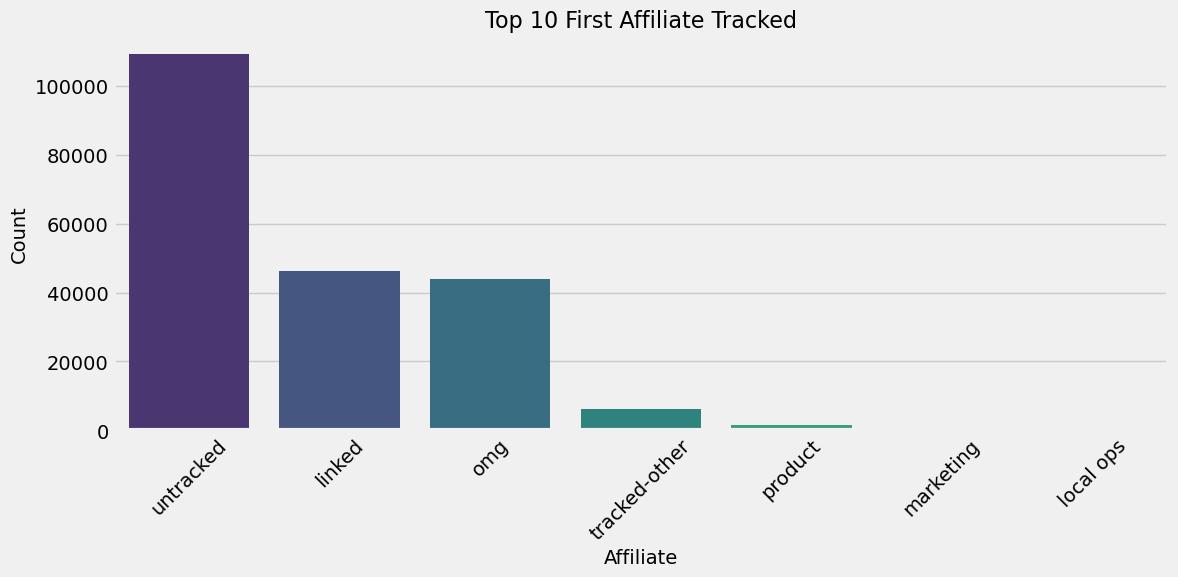

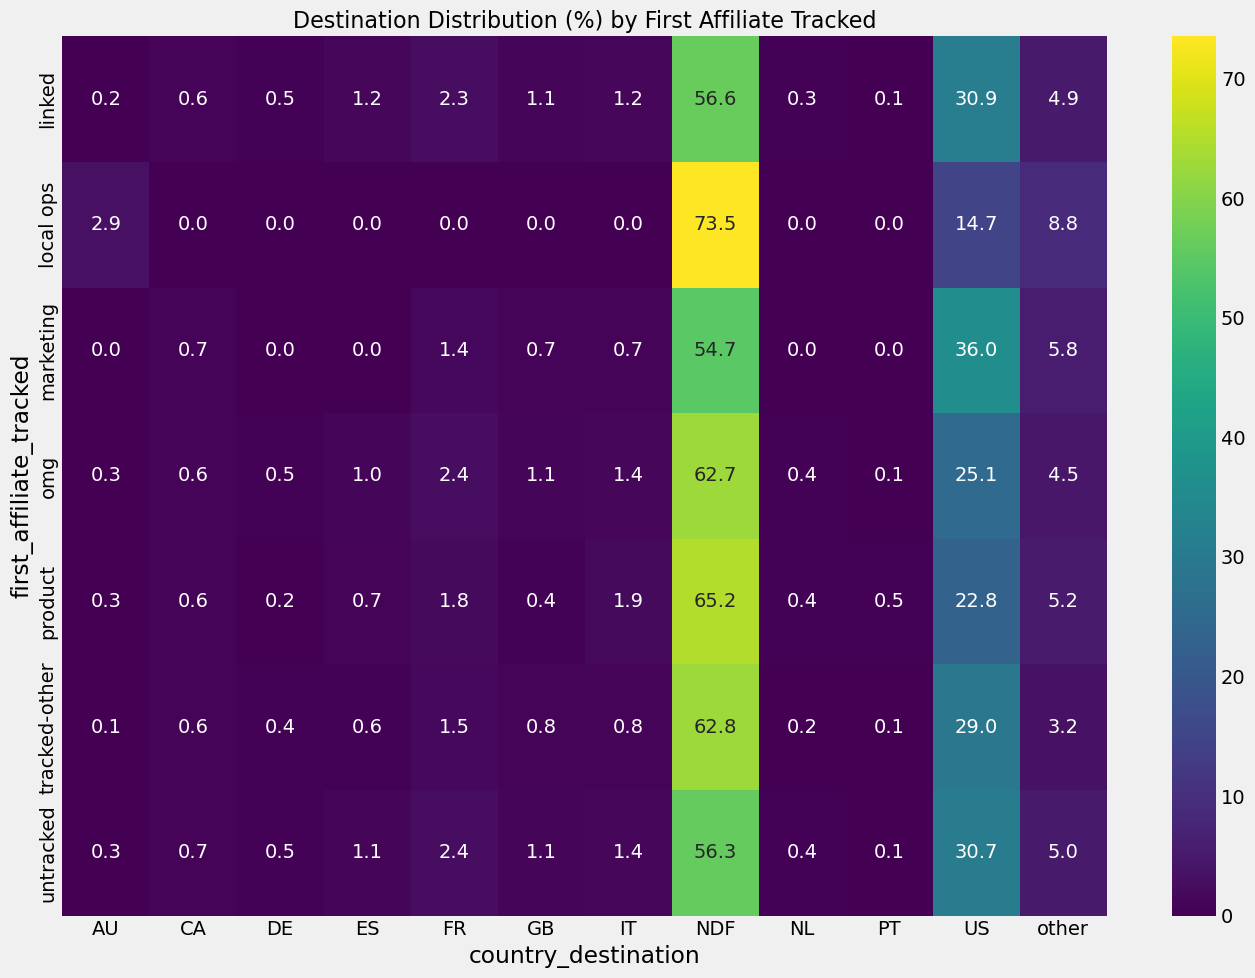

In [22]:
# First affiliate tracked distribution
top_affiliates = df['first_affiliate_tracked'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_affiliates.index, y=top_affiliates.values, palette='viridis')
plt.title('Top 10 First Affiliate Tracked', fontsize=16)
plt.xlabel('Affiliate', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affiliate tracked vs destination
affiliate_dest = pd.crosstab(df['first_affiliate_tracked'], df['country_destination'], normalize='index') * 100

plt.figure(figsize=(14, 10))
sns.heatmap(affiliate_dest, annot=True, cmap='viridis', fmt='.1f')
plt.title('Destination Distribution (%) by First Affiliate Tracked', fontsize=16)
plt.tight_layout()
plt.show()

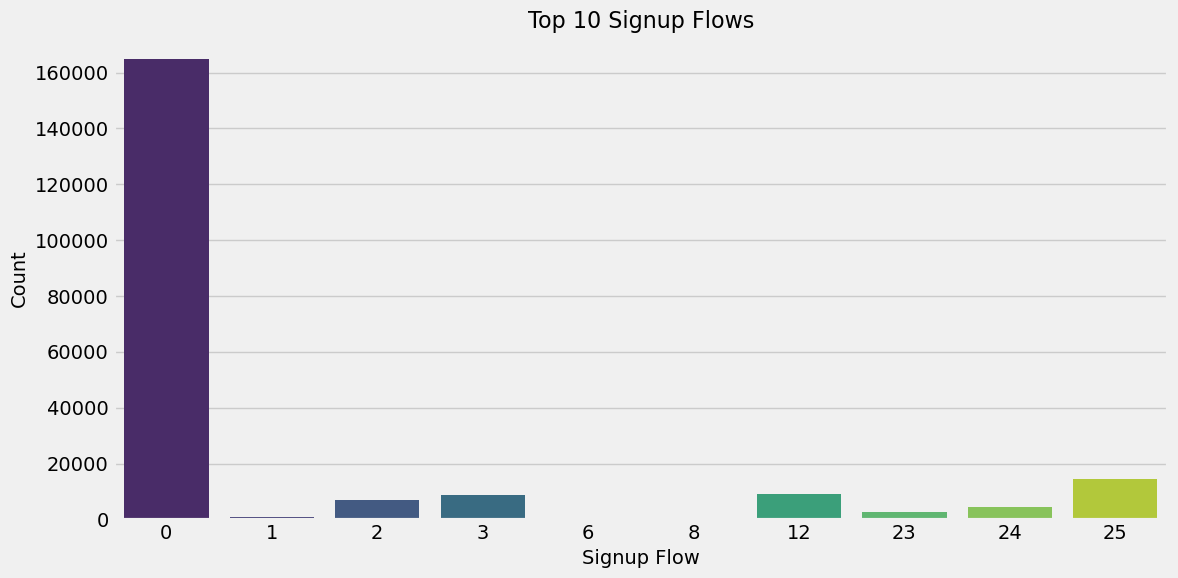

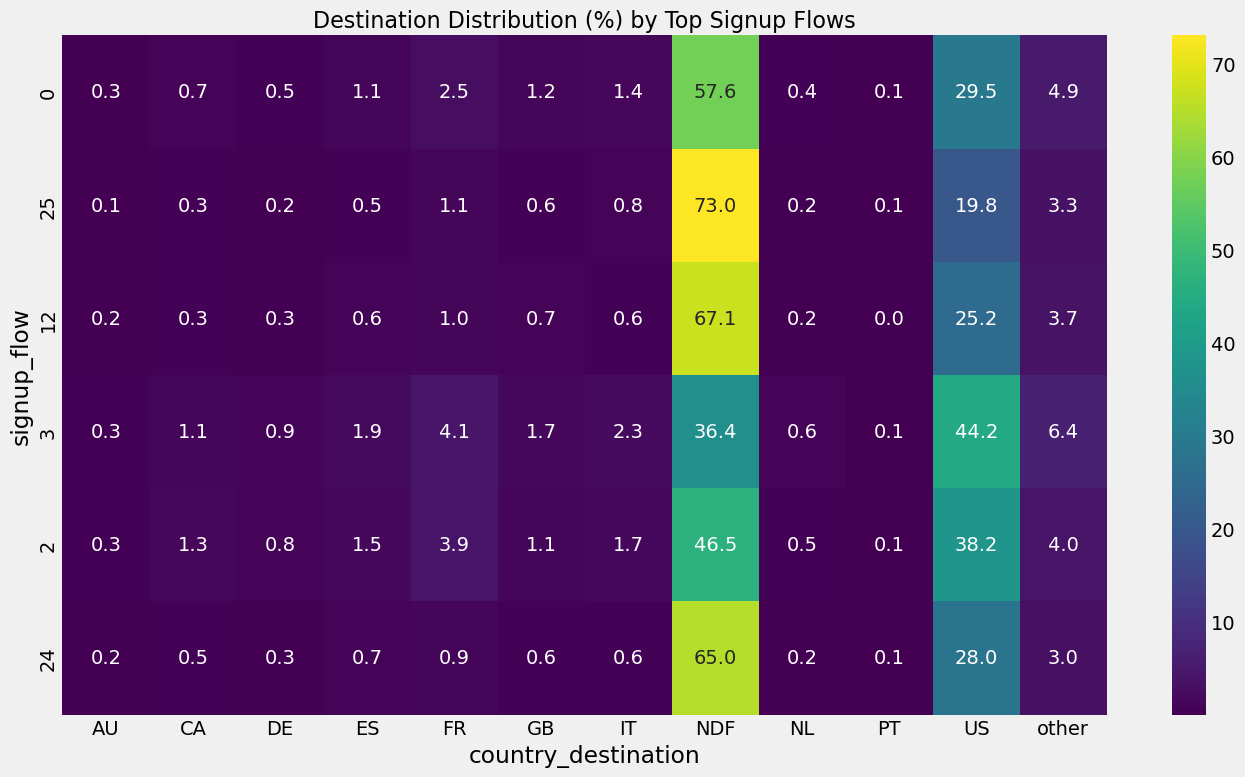

In [23]:
# Marketing channel signup flows
signup_flows = df['signup_flow'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=signup_flows.index, y=signup_flows.values, palette='viridis')
plt.title('Top 10 Signup Flows', fontsize=16)
plt.xlabel('Signup Flow', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Signup flow vs destination
flow_dest = pd.crosstab(df['signup_flow'], df['country_destination'])
flow_dest_pct = pd.crosstab(df['signup_flow'], df['country_destination'], normalize='index') * 100

# Focus on top 6 flows for readability
top_flows = signup_flows.nlargest(6).index
flow_dest_pct_filtered = flow_dest_pct.loc[top_flows]

plt.figure(figsize=(14, 8))
sns.heatmap(flow_dest_pct_filtered, annot=True, cmap='viridis', fmt='.1f')
plt.title('Destination Distribution (%) by Top Signup Flows', fontsize=16)
plt.tight_layout()
plt.show()

## Device and Browser Analysis

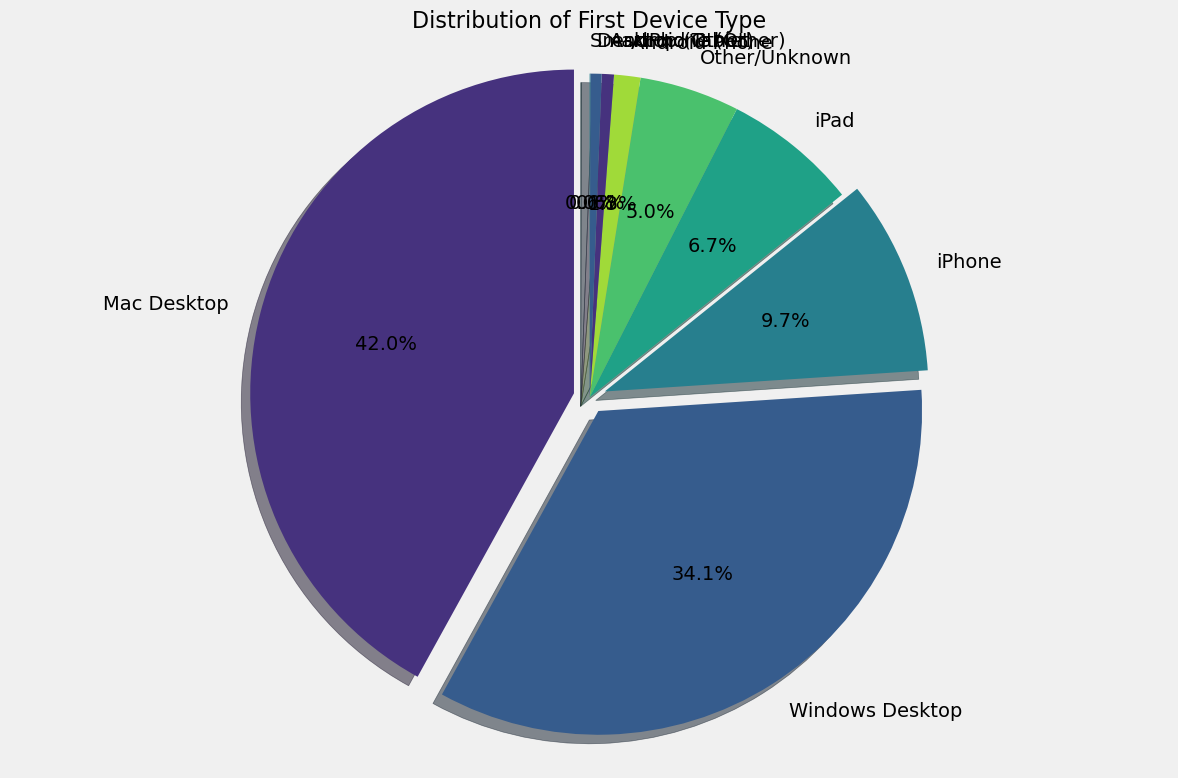

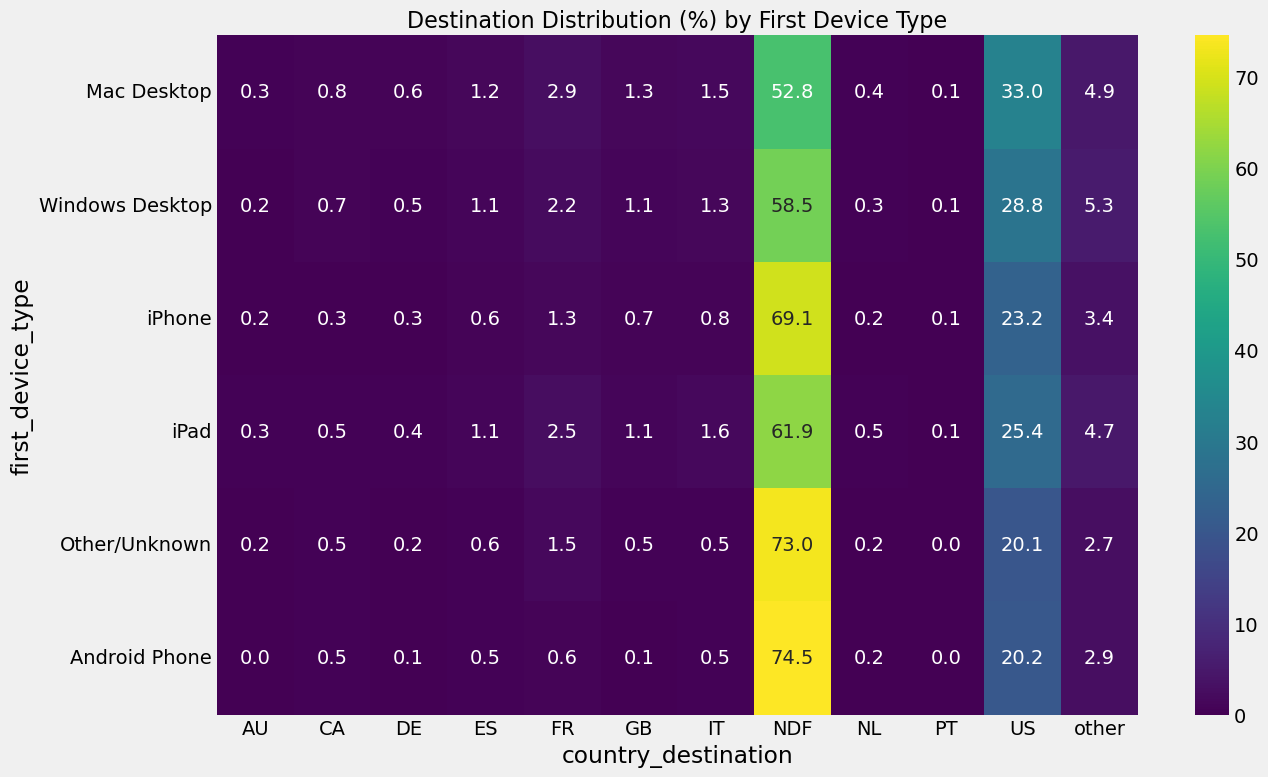

In [24]:
# Device type analysis
device_counts = df['first_device_type'].value_counts()

# Create a pie chart for device distribution
plt.figure(figsize=(12, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, 
        explode=[0.05 if i < 3 else 0 for i in range(len(device_counts))])
plt.title('Distribution of First Device Type', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Device type vs destination
# Focus on top devices for readability
top_devices = device_counts.nlargest(6).index
device_dest = pd.crosstab(df['first_device_type'], df['country_destination'])
device_dest_pct = pd.crosstab(df['first_device_type'], df['country_destination'], normalize='index') * 100
device_dest_pct_filtered = device_dest_pct.loc[top_devices]

plt.figure(figsize=(14, 8))
sns.heatmap(device_dest_pct_filtered, annot=True, cmap='viridis', fmt='.1f')
plt.title('Destination Distribution (%) by First Device Type', fontsize=16)
plt.tight_layout()
plt.show()

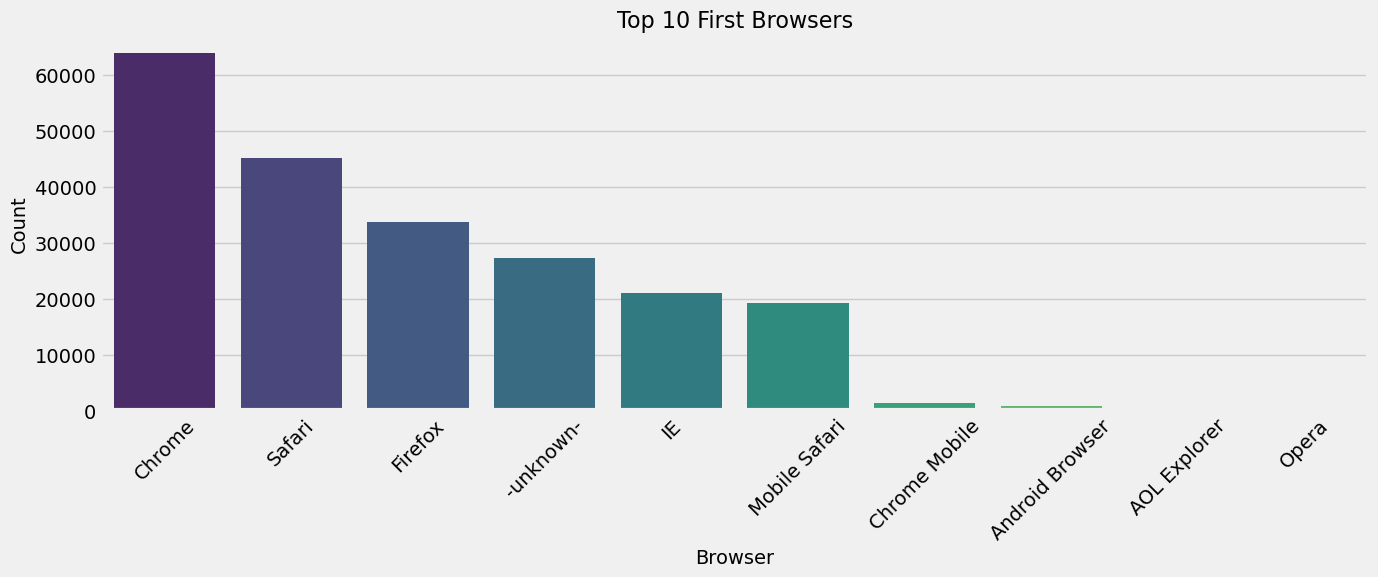

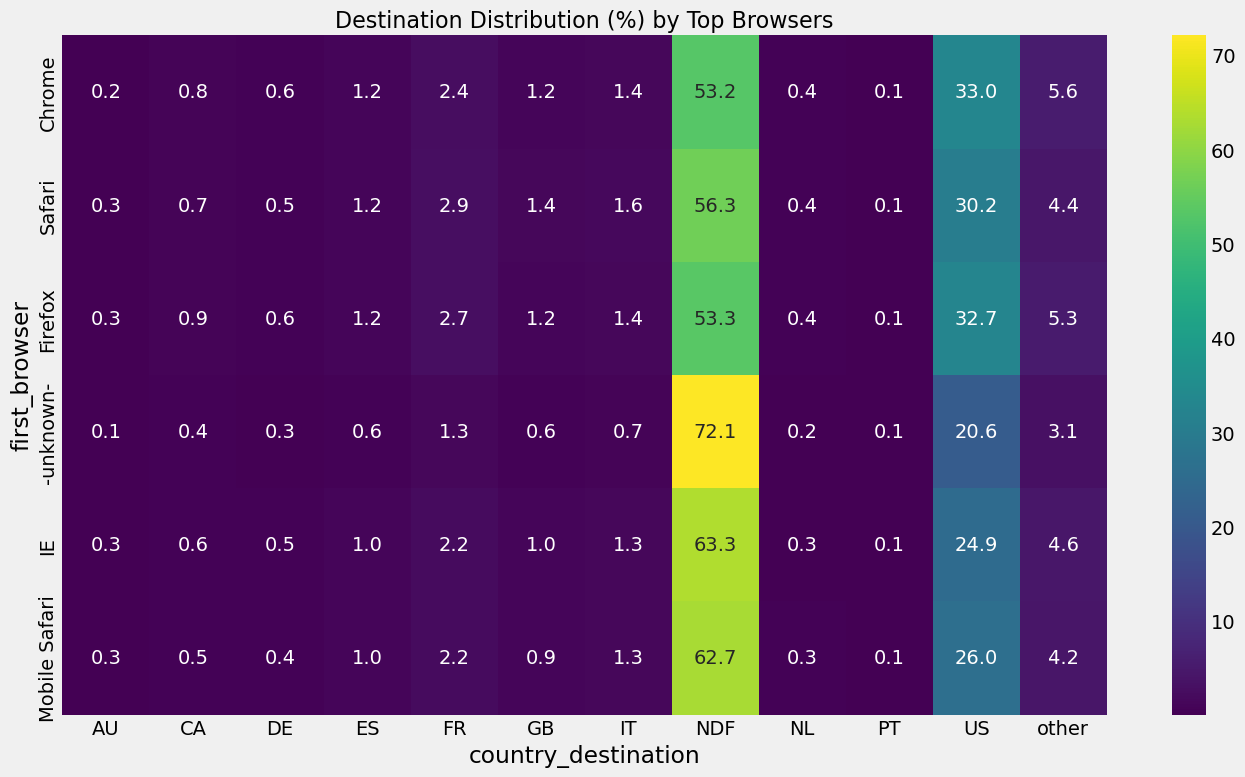

In [25]:
# Browser analysis
browser_counts = df['first_browser'].value_counts().nlargest(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=browser_counts.index, y=browser_counts.values, palette='viridis')
plt.title('Top 10 First Browsers', fontsize=16)
plt.xlabel('Browser', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Browser vs destination
# Focus on top browsers for readability
top_browsers = browser_counts.nlargest(6).index
browser_dest_pct = pd.crosstab(df['first_browser'], df['country_destination'], normalize='index') * 100
browser_dest_pct_filtered = browser_dest_pct.loc[top_browsers]

plt.figure(figsize=(14, 8))
sns.heatmap(browser_dest_pct_filtered, annot=True, cmap='viridis', fmt='.1f')
plt.title('Destination Distribution (%) by Top Browsers', fontsize=16)
plt.tight_layout()
plt.show()

## User Behavior Analysis

Let's analyze some of the engineered features related to user behavior.

In [36]:
# Check if we have the engineered features
behavior_features = ['days_before_signup', 'signup_day_of_week', 'signup_weekend']
existing_behavior_features = [col for col in behavior_features if col in df.columns]

if existing_behavior_features:
    print(f"Found engineered behavior features: {existing_behavior_features}")
else:
    print("No engineered behavior features found. Creating basic ones for analysis.")
    
    # Create some basic features if they don't exist
    if 'date_account_created' in df.columns and 'timestamp_first_active' in df.columns:
        # Convert to datetime
        df['date_account_created'] = pd.to_datetime(df['date_account_created'])
        df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
        
        # Calculate days between first active and account creation
        df['days_before_signup'] = (df['date_account_created'] - df['timestamp_first_active']).dt.days
        
        # Day of week
        df['signup_day_of_week'] = df['date_account_created'].dt.dayofweek
        df['signup_weekend'] = df['signup_day_of_week'].isin([5, 6]).astype(int)

Found engineered behavior features: ['days_before_signup', 'signup_day_of_week', 'signup_weekend']


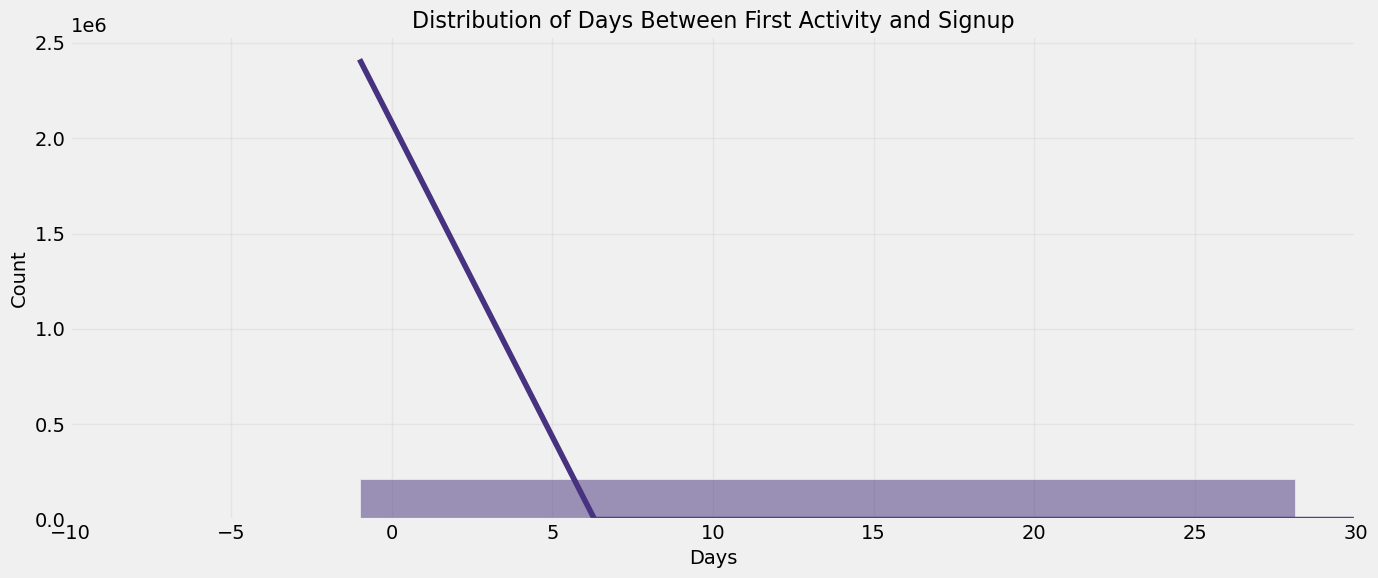

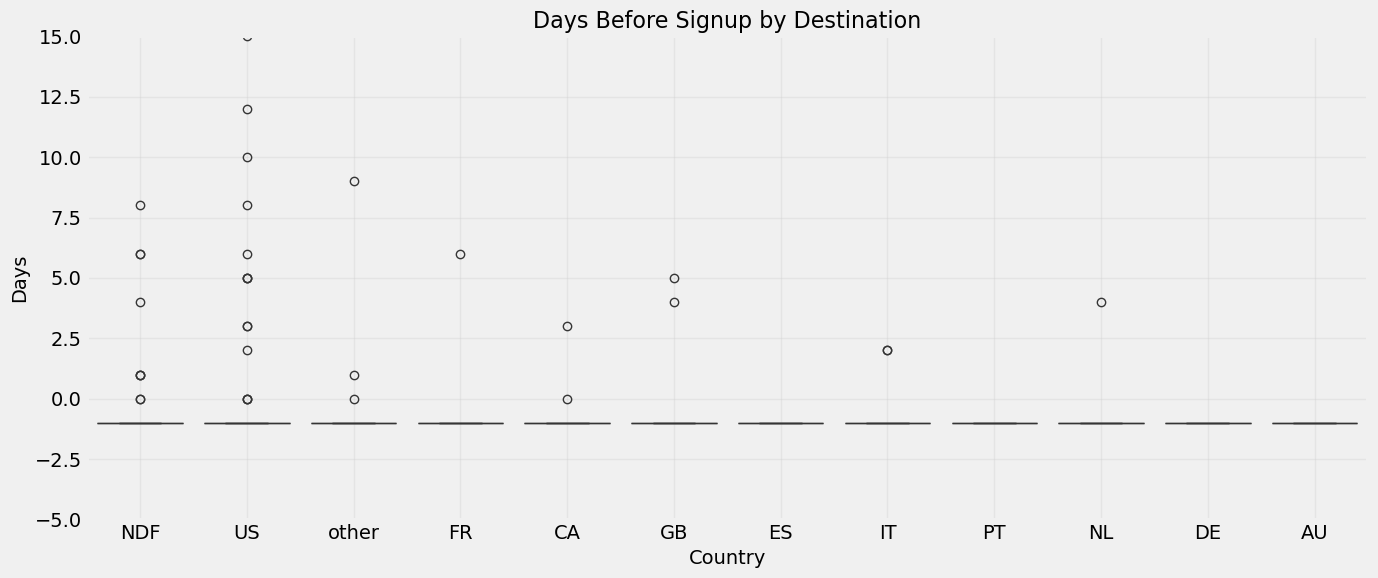

In [37]:
# Analyze days before signup
if 'days_before_signup' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.histplot(df['days_before_signup'], bins=50, kde=True)
    plt.title('Distribution of Days Between First Activity and Signup', fontsize=16)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xlim(-10, 30)  # Focus on a reasonable range
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Days before signup vs destination
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='country_destination', y='days_before_signup', data=df)
    plt.title('Days Before Signup by Destination', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Days', fontsize=14)
    plt.ylim(-5, 15)  # Focus on a reasonable range
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

1. the vast majority of users sign up on the same day they first interact with Airbnb.

2. The distribution has a long tail to the right (positive values), indicating some users are active on the platform for days or weeks before creating an account.

3. There's a steep decline after day 0, showing that the likelihood of signing up decreases dramatically as more days pass after first activity.

4. The graph also includes some negative values (left of 0), which might indicate data anomalies


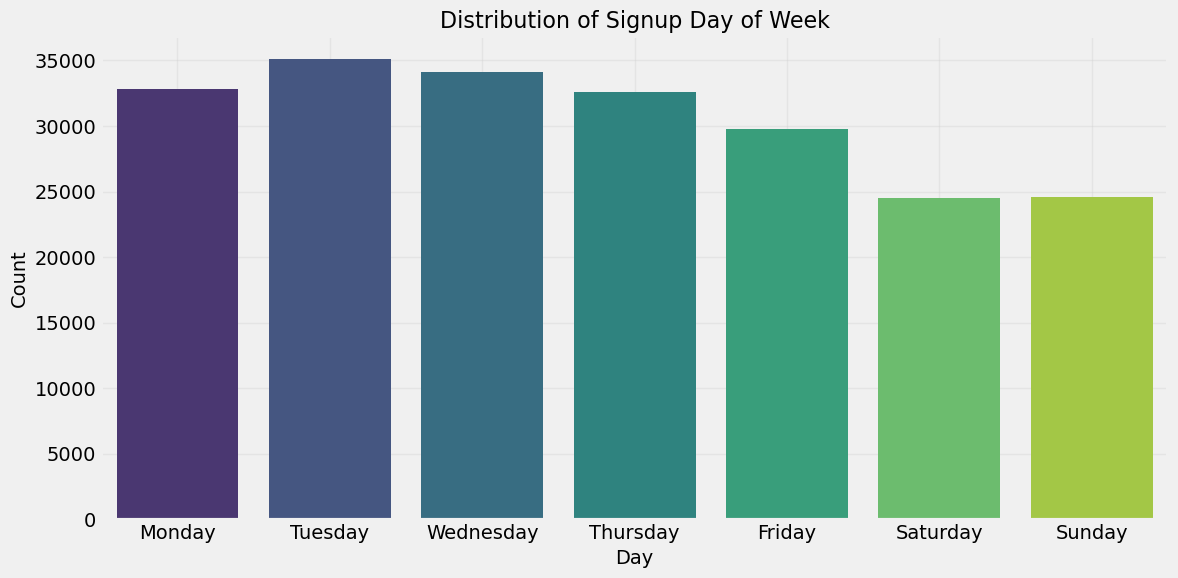

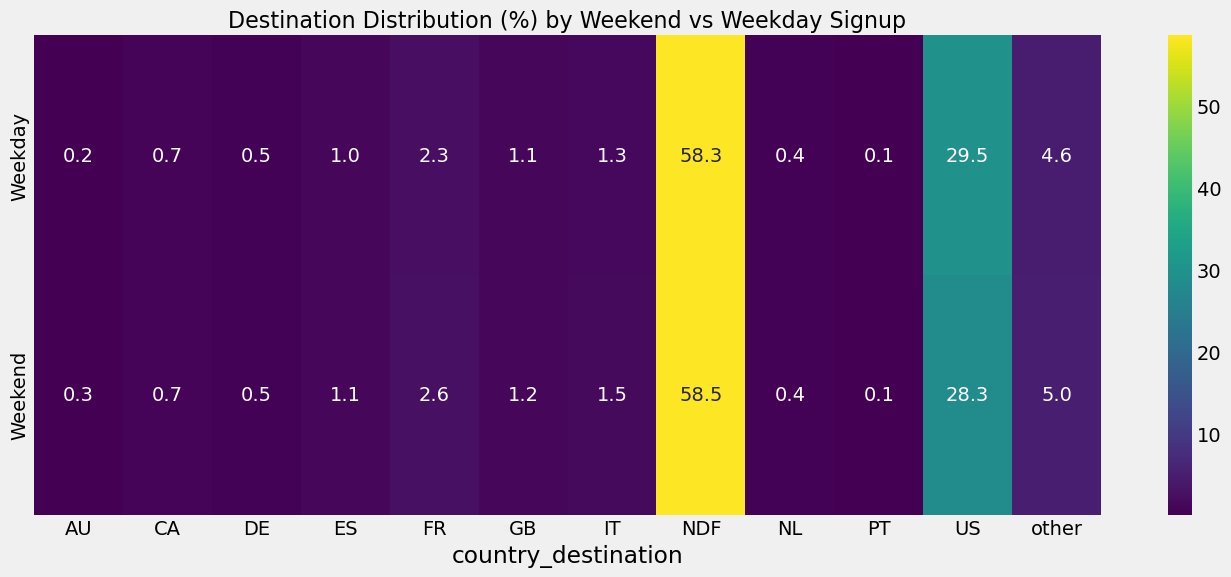

In [28]:
# Analyze signup day of week
if 'signup_day_of_week' in df.columns:
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['signup_day_of_week'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[days[i] for i in day_counts.index], y=day_counts.values, palette='viridis')
    plt.title('Distribution of Signup Day of Week', fontsize=16)
    plt.xlabel('Day', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Weekend vs weekday booking destinations
    if 'signup_weekend' in df.columns:
        weekend_dest = pd.crosstab(df['signup_weekend'], df['country_destination'])
        weekend_dest.index = ['Weekday', 'Weekend']
        weekend_dest_pct = pd.crosstab(df['signup_weekend'], df['country_destination'], normalize='index') * 100
        weekend_dest_pct.index = ['Weekday', 'Weekend']
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(weekend_dest_pct, annot=True, cmap='viridis', fmt='.1f')
        plt.title('Destination Distribution (%) by Weekend vs Weekday Signup', fontsize=16)
        plt.tight_layout()
        plt.show()

## Correlation Analysis

Let's examine correlations between numerical features and look for multicollinearity.

In [38]:
# Check which columns are numerical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['age', 'signup_flow', 'days_before_signup']


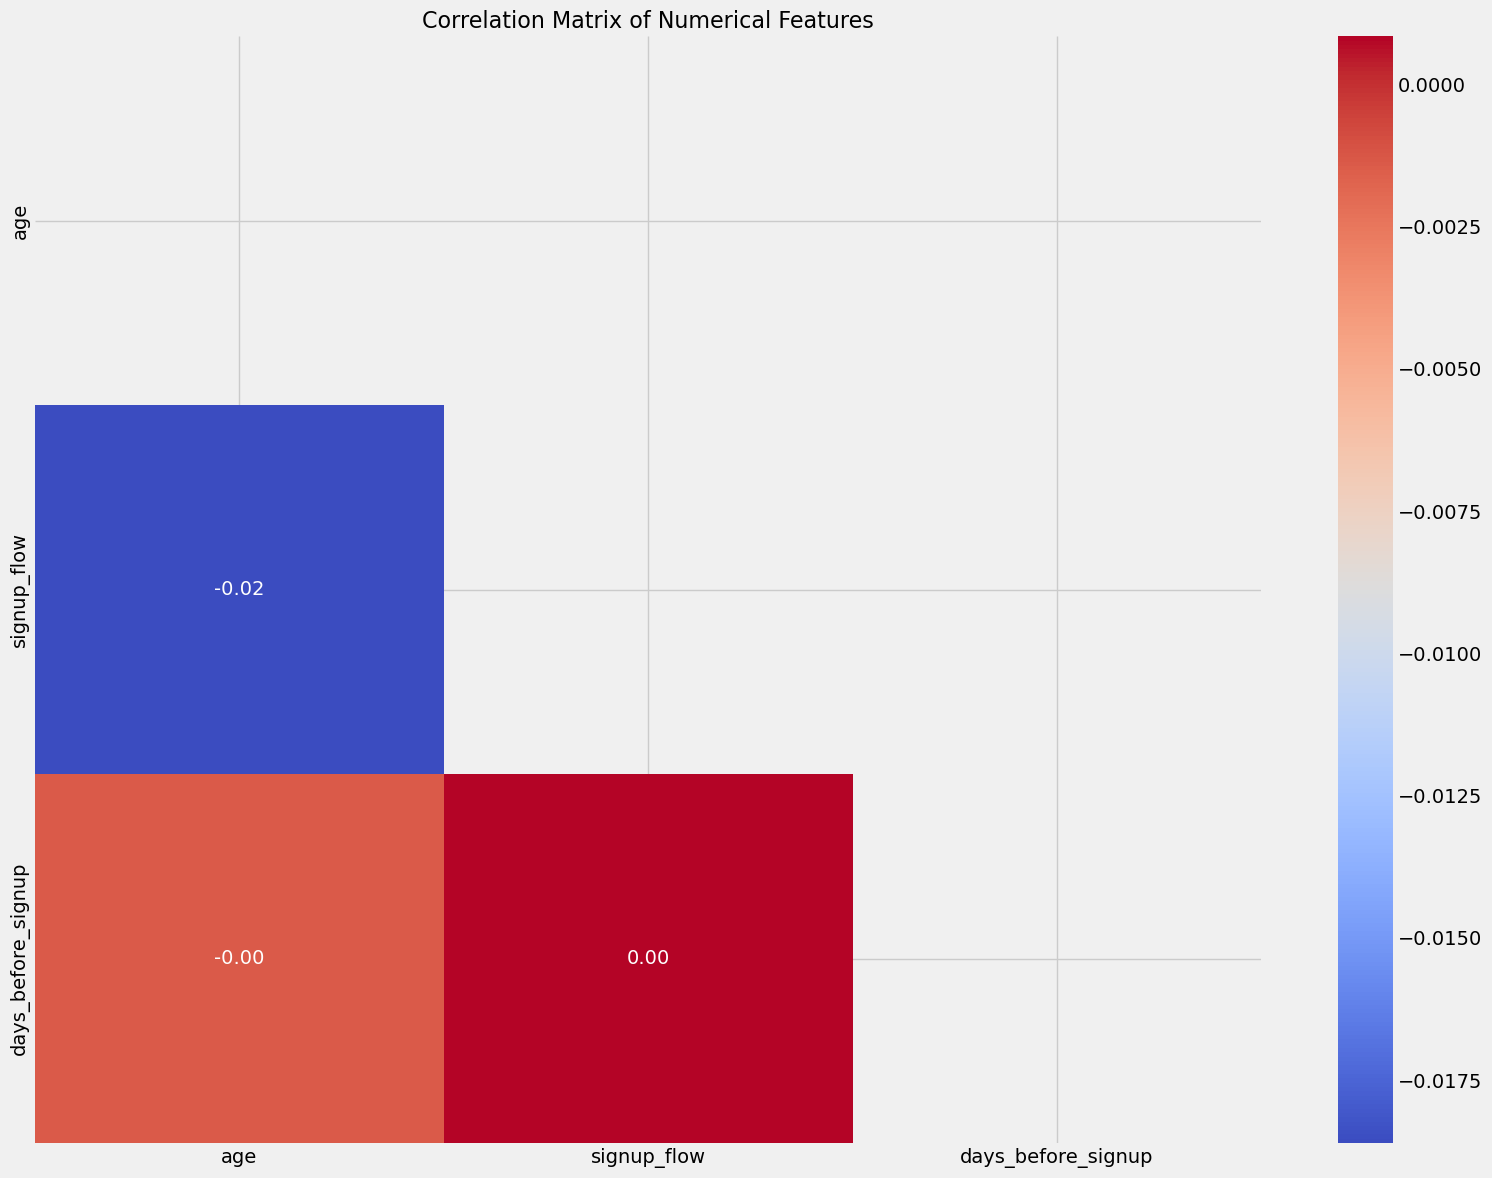

In [39]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Dimensionality Reduction and Feature Visualization

Let's use PCA and t-SNE to visualize the high-dimensional data.

In [40]:
# Prepare data for dimensionality reduction
# Select only numerical columns and categorical columns that have been encoded
feature_cols = numerical_cols.copy()

# Remove any target-related or ID columns
for col in ['id', 'country_destination']:
    if col in feature_cols:
        feature_cols.remove(col)

# Check if we have enough features
if len(feature_cols) < 2:
    print("Not enough numerical features for dimensionality reduction.")
else:
    # Standardize the features (important for PCA and t-SNE)
    from sklearn.preprocessing import StandardScaler
    X = df[feature_cols].fillna(0)  # Replace NaNs with 0 for this visualization
    X_scaled = StandardScaler().fit_transform(X)
    
    print(f"Performing dimensionality reduction with {X_scaled.shape[1]} features")

Performing dimensionality reduction with 3 features


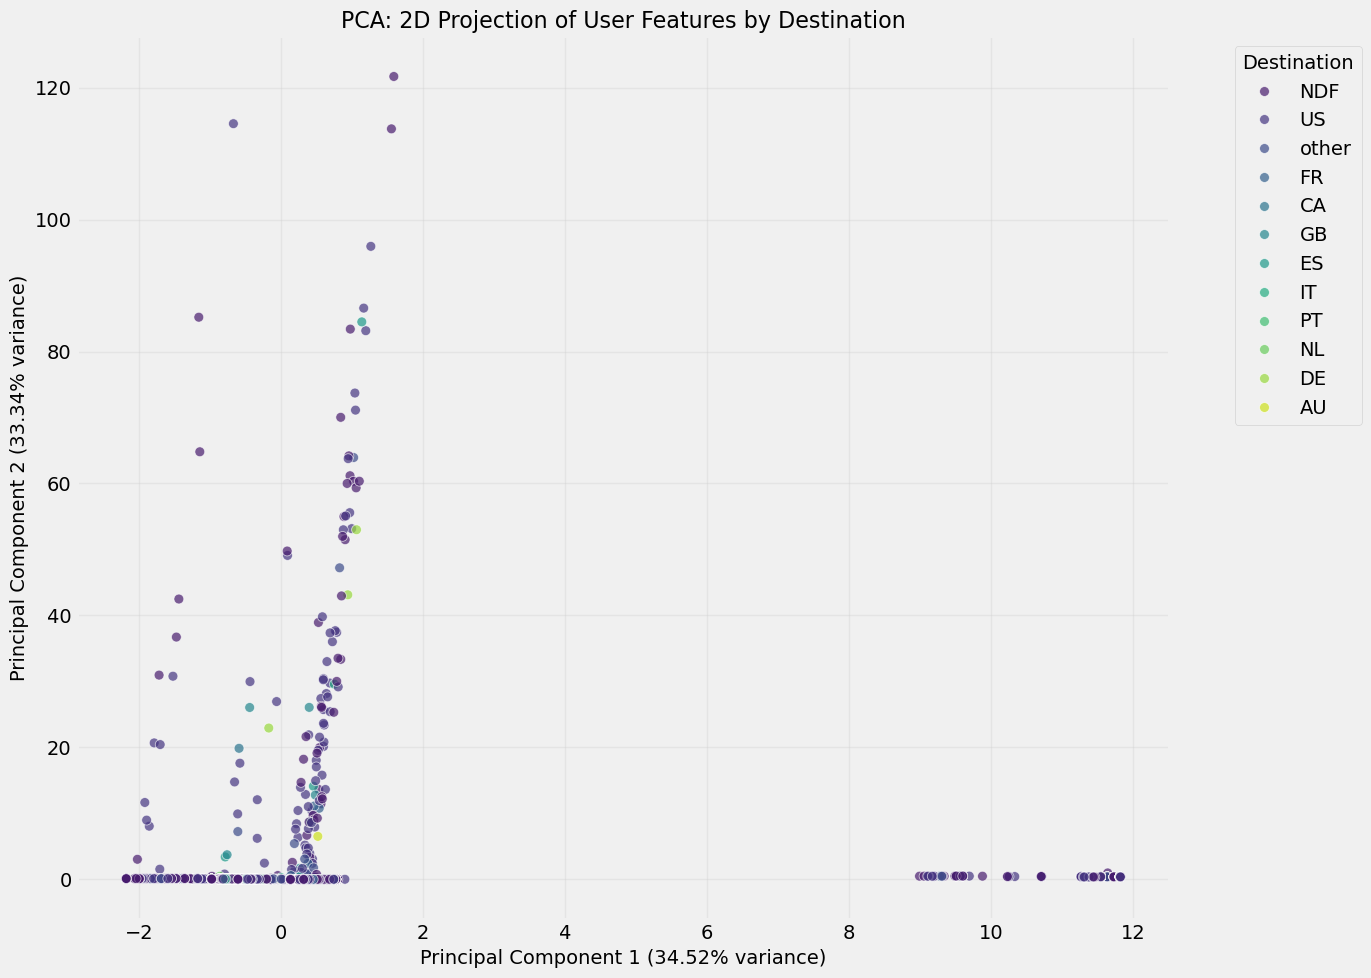

Total variance explained by 2 principal components: 67.86%


In [41]:
# PCA
if 'X_scaled' in locals() and X_scaled.shape[1] >= 2:
    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    
    # Create a DataFrame for easier plotting
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['country_destination'] = df['country_destination'].values
    
    # Plot PCA results
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='country_destination', data=pca_df, 
                    palette='viridis', s=50, alpha=0.7)
    plt.title('PCA: 2D Projection of User Features by Destination', fontsize=16)
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=14)
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Print explained variance
    print(f"Total variance explained by 2 principal components: {sum(pca.explained_variance_ratio_):.2%}")

No usefull info from PCA, the clusters are not seperated in any way!

Applying t-SNE on a sample of 5000 observations...


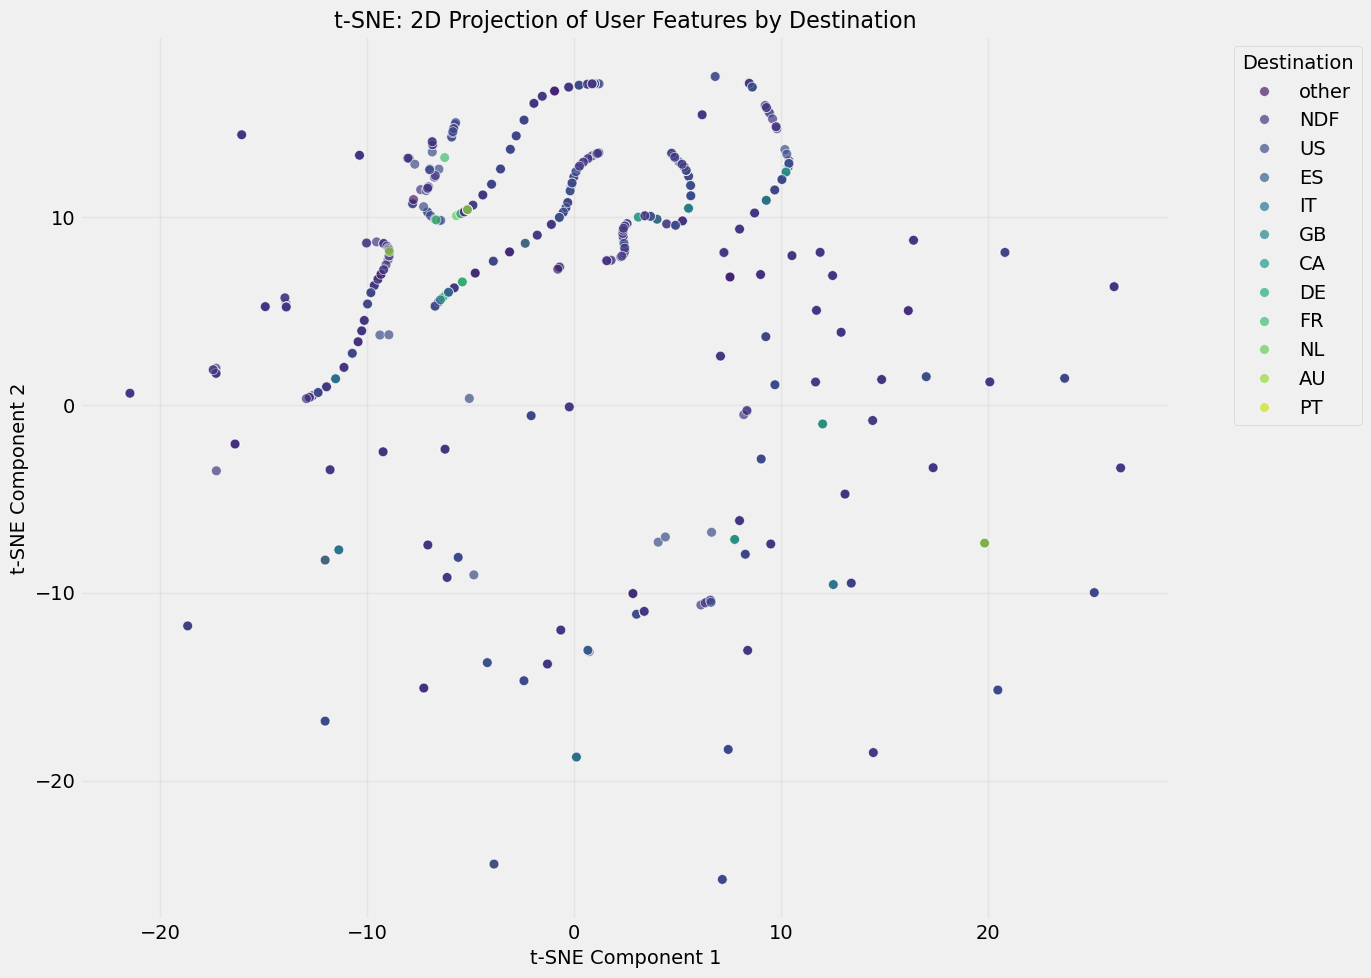

In [42]:
# t-SNE (can be slow on large datasets)
if 'X_scaled' in locals() and X_scaled.shape[1] >= 2:
    # Take a sample if dataset is large
    sample_size = min(5000, X_scaled.shape[0])
    indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_sample = X_scaled[indices]
    y_sample = df['country_destination'].iloc[indices]
    
    print(f"Applying t-SNE on a sample of {sample_size} observations...")
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
    tsne_result = tsne.fit_transform(X_sample)
    
    # Create a DataFrame for easier plotting
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    tsne_df['country_destination'] = y_sample.values
    
    # Plot t-SNE results
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='country_destination', data=tsne_df, 
                   palette='viridis', s=50, alpha=0.7)
    plt.title('t-SNE: 2D Projection of User Features by Destination', fontsize=16)
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

While there are some visible patterns, there isn't a clear separation between different destination categories. The points for different destinations are quite mixed together

There are some small clusters forming, but they don't align strongly with specific destinations, suggesting that the features used don't cleanly separate users by their destination preferences.